# Pandas vs Nvidia cuDF
This is a demonstration of the performance gain of using Nvidia's cuDF in GPU library instead of the Pandas in Memory library. A server these days has a maximum limit of [192](https://www.amd.com/en/products/processors/server/epyc/9005-series/amd-epyc-9965.html) processing cores vs Nvidia GPU core counts of 20,000+ for the [H200](https://www.nvidia.com/en-us/data-center/h200/) card. As the business problem of predicting electricity supply demand requires low latency and faster execution times GPU based solutions can offer up to 1000 times the performance of CPU based solutions with specific cores designed for vecctor operatons and complex linear algebra matrix multiplication and addition/subtraction. 

## Demo system
The demo below is based on the A2000 Ampere Card the lowest end Enterprise card available with only 3328 cores with 12GB of GDDR6 VRAM. The code base is being used by organisations like Powercor CitiPower and Ampol.

## cuDF
The cuDF library uses identical commands and API's to Pandas so python code is interchangeable. cuDF also offers a high performance c++ API that can also run in [Bluefield 3](https://www.nvidia.com/content/dam/en-zz/Solutions/Data-Center/documents/datasheet-nvidia-bluefield-3-dpu.pdf) DPU (Data Processing Unit) Network cards terminating some functions at the network leaving more capacity for GPU and CPU operations. Using [GPUDirect](https://docs.nvidia.com/gpudirect-storage/index.html)  functions the system can also bypass or accelerate Disk and Memory bottlenecks.

## Demo results
As you can see executing basic operations using Pandas (df) and cuDF(cf) show greater performance using the GPU to manimpulate matrix operations showing 33% of the time for load and 13.45% of the compute time. When using Advance cards like the H200 card expect 1000 fold performance gains

In [12]:
!nvidia-smi

Wed Jan 22 15:50:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.02              Driver Version: 566.03         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX A2000 12GB          On  |   00000000:D8:00.0  On |                    0 |
| 30%   40C    P8             10W /   70W |    1781MiB /  11514MiB |      7%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import cudf as cf
import pandas as df

In [2]:
!nemreader output-csv "examples/nem12/nem12#S01#INTEGM#NEMMCO.zip"


/home/mctouch/anaconda3/envs/nem-reader/lib/python3.12/site-packages/nemreader/outputs.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_date = nmi_df.iloc[-1][1].strftime("%Y%m%d")
Created NEM1201006_20040305_transposed.csv


In [3]:
%%time
from nemreader import NEMFile
m = NEMFile('examples/unzipped/Example_NEM12_actual_interval.csv')
nemdata = m.nem_data()
print(nemdata)

CPU times: user 60.3 ms, sys: 637 μs, total: 60.9 ms
Wall time: 73.3 ms


In [4]:
print(nemdata.header)
# HeaderRecord(version_header='NEM12', creation_date=datetime.datetime(2004, 4, 20, 13, 0), from_participant='MDA1', to_participant='Ret1')


HeaderRecord(version_header='NEM12', creation_date=datetime.datetime(2004, 5, 1, 11, 35), from_participant='MDA1', to_participant='Ret1', file_name='examples/unzipped/Example_NEM12_actual_interval.csv', assumed=False)


In [5]:
print(nemdata.transactions)
# {'VABD000163': {'E1': [], 'Q1': []}}

{'VABD000163': {'E1': [], 'Q1': []}}


In [6]:
%%time
from nemreader import NEMFile
m = NEMFile('examples/unzipped/Example_NEM12_actual_interval.csv')
df = m.get_data_frame()
print(df)

           nmi suffix      serno             t_start               t_end  \
0   VABD000163     E1  METSER123 2004-02-01 00:00:00 2004-02-01 00:30:00   
1   VABD000163     E1  METSER123 2004-02-01 00:30:00 2004-02-01 01:00:00   
2   VABD000163     E1  METSER123 2004-02-01 01:00:00 2004-02-01 01:30:00   
3   VABD000163     E1  METSER123 2004-02-01 01:30:00 2004-02-01 02:00:00   
4   VABD000163     E1  METSER123 2004-02-01 02:00:00 2004-02-01 02:30:00   
..         ...    ...        ...                 ...                 ...   
43  VABD000163     Q1  METSER123 2004-02-01 21:30:00 2004-02-01 22:00:00   
44  VABD000163     Q1  METSER123 2004-02-01 22:00:00 2004-02-01 22:30:00   
45  VABD000163     Q1  METSER123 2004-02-01 22:30:00 2004-02-01 23:00:00   
46  VABD000163     Q1  METSER123 2004-02-01 23:00:00 2004-02-01 23:30:00   
47  VABD000163     Q1  METSER123 2004-02-01 23:30:00 2004-02-02 00:00:00   

    value quality evt_code evt_desc  
0   1.111       A                    
1   1.111  

In [7]:
%%time
from nemreader import NEMFile
m = NEMFile('examples/unzipped/Example_NEM12_actual_interval.csv')
cf = m.get_data_frame()
print(cf)

           nmi suffix      serno             t_start               t_end  \
0   VABD000163     E1  METSER123 2004-02-01 00:00:00 2004-02-01 00:30:00   
1   VABD000163     E1  METSER123 2004-02-01 00:30:00 2004-02-01 01:00:00   
2   VABD000163     E1  METSER123 2004-02-01 01:00:00 2004-02-01 01:30:00   
3   VABD000163     E1  METSER123 2004-02-01 01:30:00 2004-02-01 02:00:00   
4   VABD000163     E1  METSER123 2004-02-01 02:00:00 2004-02-01 02:30:00   
..         ...    ...        ...                 ...                 ...   
43  VABD000163     Q1  METSER123 2004-02-01 21:30:00 2004-02-01 22:00:00   
44  VABD000163     Q1  METSER123 2004-02-01 22:00:00 2004-02-01 22:30:00   
45  VABD000163     Q1  METSER123 2004-02-01 22:30:00 2004-02-01 23:00:00   
46  VABD000163     Q1  METSER123 2004-02-01 23:00:00 2004-02-01 23:30:00   
47  VABD000163     Q1  METSER123 2004-02-01 23:30:00 2004-02-02 00:00:00   

    value quality evt_code evt_desc  
0   1.111       A                    
1   1.111  

In [8]:
df = m.get_pivot_data_frame()
print(df)

           nmi             t_start               t_end     E1     Q1 quality  \
0   VABD000163 2004-02-01 00:00:00 2004-02-01 00:30:00  1.111  2.222       A   
1   VABD000163 2004-02-01 00:30:00 2004-02-01 01:00:00  1.111  2.222       A   
2   VABD000163 2004-02-01 01:00:00 2004-02-01 01:30:00  1.111  2.222       A   
3   VABD000163 2004-02-01 01:30:00 2004-02-01 02:00:00  1.111  2.222       A   
4   VABD000163 2004-02-01 02:00:00 2004-02-01 02:30:00  1.111  2.222       A   
5   VABD000163 2004-02-01 02:30:00 2004-02-01 03:00:00  1.111  2.222       A   
6   VABD000163 2004-02-01 03:00:00 2004-02-01 03:30:00  1.111  2.222       A   
7   VABD000163 2004-02-01 03:30:00 2004-02-01 04:00:00  1.111  2.222       A   
8   VABD000163 2004-02-01 04:00:00 2004-02-01 04:30:00  1.111  2.222       A   
9   VABD000163 2004-02-01 04:30:00 2004-02-01 05:00:00  1.111  2.222       A   
10  VABD000163 2004-02-01 05:00:00 2004-02-01 05:30:00  1.111  2.222       A   
11  VABD000163 2004-02-01 05:30:00 2004-

In [9]:
df = m.get_pivot_data_frame()
print(df)

           nmi             t_start               t_end     E1     Q1 quality  \
0   VABD000163 2004-02-01 00:00:00 2004-02-01 00:30:00  1.111  2.222       A   
1   VABD000163 2004-02-01 00:30:00 2004-02-01 01:00:00  1.111  2.222       A   
2   VABD000163 2004-02-01 01:00:00 2004-02-01 01:30:00  1.111  2.222       A   
3   VABD000163 2004-02-01 01:30:00 2004-02-01 02:00:00  1.111  2.222       A   
4   VABD000163 2004-02-01 02:00:00 2004-02-01 02:30:00  1.111  2.222       A   
5   VABD000163 2004-02-01 02:30:00 2004-02-01 03:00:00  1.111  2.222       A   
6   VABD000163 2004-02-01 03:00:00 2004-02-01 03:30:00  1.111  2.222       A   
7   VABD000163 2004-02-01 03:30:00 2004-02-01 04:00:00  1.111  2.222       A   
8   VABD000163 2004-02-01 04:00:00 2004-02-01 04:30:00  1.111  2.222       A   
9   VABD000163 2004-02-01 04:30:00 2004-02-01 05:00:00  1.111  2.222       A   
10  VABD000163 2004-02-01 05:00:00 2004-02-01 05:30:00  1.111  2.222       A   
11  VABD000163 2004-02-01 05:30:00 2004-

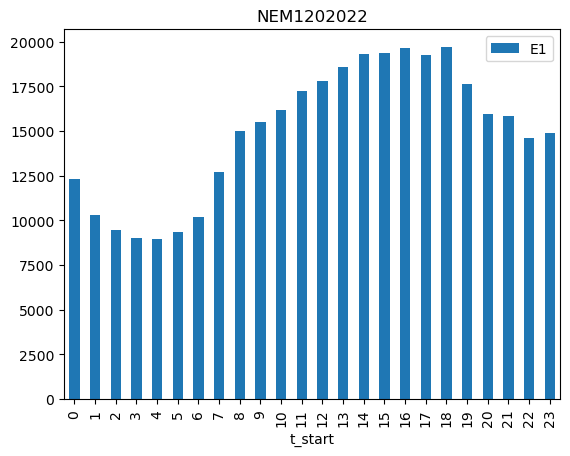

CPU times: user 693 ms, sys: 48 ms, total: 741 ms
Wall time: 1.62 s


In [10]:
%%time
import matplotlib.pyplot as plt
from nemreader import output_as_data_frames

# Setup Pandas DataFrame
dfs = output_as_data_frames("examples/nem12/NEM12#000000000000002#CNRGYMDP#NEMMCO.zip")
nmi, df = dfs[0] # Return data for first NMI in file
df.set_index("t_start", inplace=True)

# Chart time of day profile
hourly = df.groupby([(df.index.hour)]).sum(numeric_only=True)
plot = hourly.plot(title=nmi, kind="bar", y=["E1"])
plt.show()

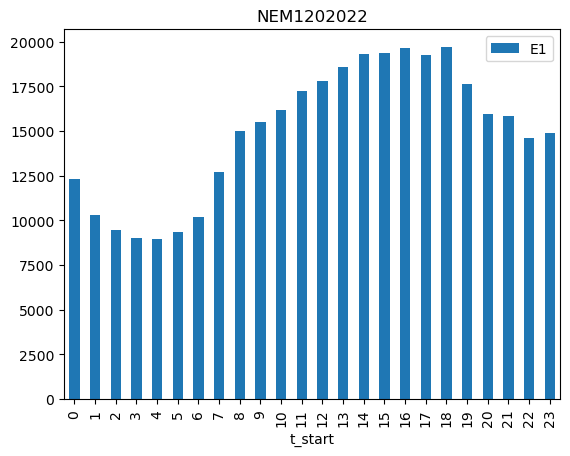

CPU times: user 226 ms, sys: 372 μs, total: 227 ms
Wall time: 217 ms


In [11]:
%%time
import matplotlib.pyplot as plt
from nemreader import output_as_cudf_data_frames

# Setup Pandas DataFrame
dfs = output_as_data_frames("examples/nem12/NEM12#000000000000002#CNRGYMDP#NEMMCO.zip")
nmi, df = dfs[0] # Return data for first NMI in file
df.set_index("t_start", inplace=True)

# Chart time of day profile
hourly = df.groupby([(df.index.hour)]).sum(numeric_only=True)
plot = hourly.plot(title=nmi, kind="bar", y=["E1"])
plt.show()

In [13]:
numerator = 10.6
denominator = 31.2

# Calculate percentage
percentage = (numerator / denominator) * 100

# Output result
print(f"{numerator} as a percentage of {denominator} is {percentage:.2f}%")

10.6 as a percentage of 31.2 is 33.97%


In [14]:

numerator = 217
denominator = 1620

# Calculate percentage
percentage = (numerator / denominator) * 100

# Output result
print(f"{numerator} as a percentage of {denominator} is {percentage:.2f}%")


217 as a percentage of 1620 is 13.40%
